In [1]:
# importing data
import pandas as pd
import numpy as np
np.random_state = 42
data = pd.read_csv('D:/MSBA/10 Applied Machine Learning/assignment/2/adult_income.csv')
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country Income level  
0          2174             0              40  United-States        <=50K  
1             0             0 

In [2]:
# changing a few variables
data['country'] = ['US' if x == 'United-States' else 'Non US' for x in data['native-country']]
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income level,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,US
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,US
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,US
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,US
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Non US


In [3]:
# droping unrequired variables
data_new = data.drop(['education','native-country'], axis = 1)
data_new.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Income level,country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,US
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,US
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,US
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,US
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,Non US


In [4]:
# one-hot coding categorical data
data_new = pd.get_dummies(data_new, drop_first = True)
data_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Income level_ >50K,country_US
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [5]:
# creating X and y varible from data
X = data_new.drop('Income level_ >50K', axis = 1)
y = data.iloc[:,-2]
print(X.shape)

(32561, 45)


In [22]:
# scaling features
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
print(X[:1])

[[ 0.03067056 -1.06361075  1.13473876  0.1484529  -0.21665953 -0.03542945
  -0.17429511 -0.26209736 -0.01466381 -1.5167923  -0.18838933 -0.29093568
   4.90769968 -0.02073999 -0.02658695 -0.92284068 -0.11403678  1.43105786
  -0.1802846  -0.17735813  2.76348874 -0.01662771 -0.37949517 -0.37774555
  -0.17745022 -0.20957797 -0.25595432 -0.33554133 -0.06780164 -0.38166338
  -0.14260848 -0.35531609 -0.17127887 -0.22710355  1.70899099 -0.17624972
  -0.42934582 -0.34403232 -0.22492681 -0.18155194 -0.32576824 -0.09161163
   0.4130197   0.70307135  0.34095391]]


In [23]:
# adding columns to transformed X
X = pd.DataFrame(X)
X.columns = data_new.drop('Income level_ >50K', axis = 1).columns
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,country_US
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,-1.516792,...,-0.17625,-0.429346,-0.344032,-0.224927,-0.181552,-0.325768,-0.091612,0.413020,0.703071,0.340954
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-0.174295,-0.262097,-0.014664,-1.516792,...,-0.17625,-0.429346,-0.344032,-0.224927,-0.181552,-0.325768,-0.091612,0.413020,0.703071,0.340954
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,...,-0.17625,-0.429346,-0.344032,-0.224927,-0.181552,-0.325768,-0.091612,0.413020,0.703071,0.340954
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,...,-0.17625,-0.429346,-0.344032,-0.224927,-0.181552,3.069667,-0.091612,-2.421192,0.703071,0.340954
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,...,-0.17625,-0.429346,-0.344032,4.445891,-0.181552,3.069667,-0.091612,-2.421192,-1.422331,-2.932948


# Task 1: running clustering algorithm in above dataset

In [24]:
# clustering dataset using k-means
import numpy as np
from sklearn.mixture import GaussianMixture

np.random.seed(42)

clust = GaussianMixture()

aic = []

for k in range(2,10):
    clust.set_params(n_components = k)
    clust.fit(X)
    aic.append(clust.aic(X))

print(aic)

[1114785.4812798253, 108148.68119923287, -901008.392583642, -439400.0514441171, -3600407.964438081, -2940366.2745494745, -2369680.374183238, -3514265.896989672]


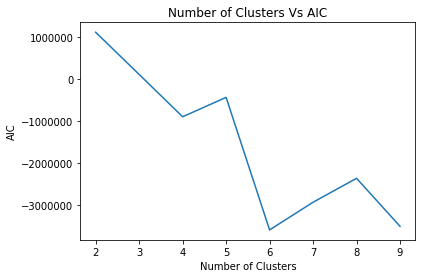

In [25]:
# plotting elbow curve between number of clusters and rmse
import matplotlib.pyplot as plt
def plot_line(x,y,title,ylabel,xlabel):
    plt.plot(x,y)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
plot_line(range(2,10),aic,'Number of Clusters Vs AIC','AIC','Number of Clusters')

# Feature Selection Algorithm: Decision Tree

In [26]:
# feature selection through decision tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
import pandas as pd
feature_imp = pd.DataFrame({'name':X.columns, 'score':dt_clf.feature_importances_})
print(feature_imp.sort_values('score', ascending = False))

                                    name     score
15     marital-status_Married-civ-spouse  0.197771
1                                 fnlwgt  0.191211
2                          education-num  0.124119
0                                    age  0.115023
3                           capital-gain  0.105674
5                         hours-per-week  0.070647
4                           capital-loss  0.038724
9                      workclass_Private  0.010566
23            occupation_Exec-managerial  0.009474
11            workclass_Self-emp-not-inc  0.009432
31                      occupation_Sales  0.009008
22               occupation_Craft-repair  0.008291
43                              sex_Male  0.007481
29             occupation_Prof-specialty  0.007332
42                            race_White  0.006940
44                            country_US  0.006699
38                     relationship_Wife  0.006554
26          occupation_Machine-op-inspct  0.006334
7                    workclass_

In [28]:
# selecting top features based on above table
X_sub = X[['marital-status_Married-civ-spouse','fnlwgt','education-num','age','capital-gain']]
X_sub.shape

(32561, 5)

In [29]:
# making cluster with just above features
def clustering(X):
    dr_clust = GaussianMixture()
    aic = []
    for k in range(2,10):
        dr_clust.set_params(n_components = k)
        dr_clust.fit(X)
        aic.append(dr_clust.aic(X))
    return aic

dr_rmse = clustering(X_sub)
print(dr_rmse)

[132229.5298634086, -231848.3147149642, -398797.77440903365, -237805.09648678877, -406435.57612657215, -406601.3997667171, -407070.8626747847, -413277.9159102402]


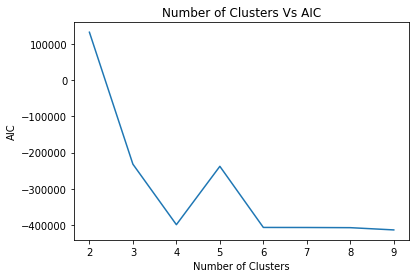

In [30]:
plot_line(range(2,10), dr_rmse,'Number of Clusters Vs AIC','AIC','Number of Clusters')

In [31]:
kmeans_comparision = pd.DataFrame({'Clusters':range(2,10),'Normal':aic,'DR_dt':dr_rmse})
print(kmeans_comparision)

   Clusters        Normal          DR_dt
0         2  1.114785e+06  132229.529863
1         3  1.081487e+05 -231848.314715
2         4 -9.010084e+05 -398797.774409
3         5 -4.394001e+05 -237805.096487
4         6 -3.600408e+06 -406435.576127
5         7 -2.940366e+06 -406601.399767
6         8 -2.369680e+06 -407070.862675
7         9 -3.514266e+06 -413277.915910


In [32]:
# function for adding column to a dataframe
def add_column(df,col_name, col):
    df[col_name] = col

# Dimensionality Reduction - PCA

In [33]:
# using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
print([round(x,4) for x in pca.explained_variance_ratio_])

[0.0721, 0.0485, 0.0451, 0.0391, 0.0351, 0.0338, 0.0314, 0.0295, 0.0275, 0.0264, 0.0259, 0.0251, 0.025, 0.0243, 0.0242, 0.0236, 0.0235, 0.0233, 0.0232, 0.0227, 0.0225, 0.0224, 0.0222, 0.0221, 0.0219, 0.0217, 0.0215, 0.0214, 0.0209, 0.0201, 0.0199, 0.0195, 0.0179, 0.0166, 0.0153, 0.0147, 0.0132, 0.0106, 0.0095, 0.0077, 0.0044, 0.0037, 0.0008, 0.0002, 0.0]


In [35]:
# as can be seen from above ratio top 2 companents explain 90% variance in data
pca = PCA(n_components = 28)
X_pca_transformed = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.07207545, 0.04854505, 0.04506279, 0.03906957, 0.03508676,
       0.03384713, 0.03138441, 0.02948945, 0.02747803, 0.02639769,
       0.02585339, 0.02505067, 0.02500676, 0.02430624, 0.02418087,
       0.0236415 , 0.02350862, 0.02324821, 0.02321749, 0.02268304,
       0.02247795, 0.02235867, 0.02217107, 0.02214   , 0.0219025 ,
       0.02170319, 0.02144357, 0.02136082])

In [36]:
# using transformed X_pca for clustering
pca_rmse = clustering(X_pca_transformed)
print(pca_rmse)

[2169643.872688179, 1420814.3532004736, 1635830.2208835655, 851774.2847855528, -116920.15376540596, 647727.7920913582, 296108.34106821043, -512856.197747527]


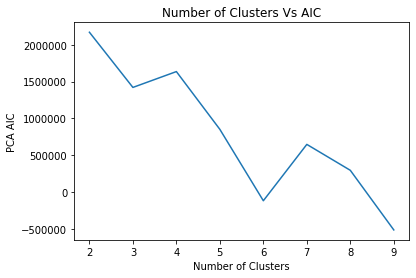

In [37]:
plot_line(range(2,10), pca_rmse,'Number of Clusters Vs AIC','PCA AIC','Number of Clusters')

In [38]:
# adding pca_rmse in DF with other RMSEs
add_column(kmeans_comparision,'pca_AIC', pca_rmse)
print(kmeans_comparision)

   Clusters        Normal          DR_dt       pca_AIC
0         2  1.114785e+06  132229.529863  2.169644e+06
1         3  1.081487e+05 -231848.314715  1.420814e+06
2         4 -9.010084e+05 -398797.774409  1.635830e+06
3         5 -4.394001e+05 -237805.096487  8.517743e+05
4         6 -3.600408e+06 -406435.576127 -1.169202e+05
5         7 -2.940366e+06 -406601.399767  6.477278e+05
6         8 -2.369680e+06 -407070.862675  2.961083e+05
7         9 -3.514266e+06 -413277.915910 -5.128562e+05


# Dimensionality Reduction : ICA

In [39]:
# using ICA to find out important dimmensions from the dataset
from sklearn.decomposition import FastICA

ica = FastICA()
kmeans = GaussianMixture()

ica_n_comp = []
ica_n_clust = []
ica_aic = []

for n in range(2,14):
    ica.set_params(n_components = n)
    X_ica = ica.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_components = k)
        kmeans.fit(X_ica)
        ica_n_comp.append(n)
        ica_n_clust.append(k)
        ica_aic.append(kmeans.aic(X_ica))

In [40]:
ica_matrix = pd.DataFrame({'n_components':ica_n_comp, 'n_clusters':ica_n_clust, 'AIC':ica_aic})
print(ica_matrix.sort_values('AIC'))

    n_components  n_clusters           AIC
95            13           9 -3.629503e+06
94            13           8 -3.599062e+06
93            13           7 -3.553592e+06
92            13           6 -3.540875e+06
91            13           5 -3.486282e+06
..           ...         ...           ...
4              2           6 -5.088790e+05
3              2           5 -5.084915e+05
2              2           4 -5.071696e+05
1              2           3 -5.064780e+05
0              2           2 -4.998311e+05

[96 rows x 3 columns]


In [41]:
print(ica_matrix[ica_matrix['n_components']==13])

    n_components  n_clusters           AIC
88            13           2 -3.317820e+06
89            13           3 -3.413924e+06
90            13           4 -3.425408e+06
91            13           5 -3.486282e+06
92            13           6 -3.540875e+06
93            13           7 -3.553592e+06
94            13           8 -3.599062e+06
95            13           9 -3.629503e+06


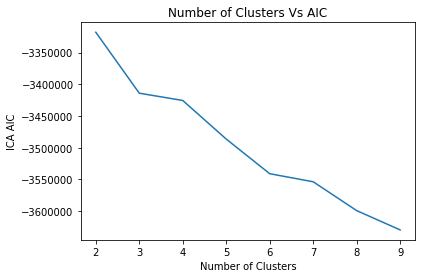

In [42]:
plot_line(range(2,10), ica_matrix[ica_matrix['n_components']==13]['AIC'],'Number of Clusters Vs AIC','ICA AIC','Number of Clusters')

In [65]:
kmeans_comparision.drop(['ica_AIC','grp_AIC'], axis = 1, inplace = True)
kmeans_comparision

,Clusters,Normal,DR_dt,pca_AIC
0,2,1.114785e+06,132229.529863,2.169644e+06
1,3,1.081487e+05,-231848.314715,1.420814e+06
2,4,-9.010084e+05,-398797.774409,1.635830e+06
3,5,-4.394001e+05,-237805.096487,8.517743e+05
4,6,-3.600408e+06,-406435.576127,-1.169202e+05
5,7,-2.940366e+06,-406601.399767,6.477278e+05
6,8,-2.369680e+06,-407070.862675,2.961083e+05
7,9,-3.514266e+06,-413277.915910,-5.128562e+05


In [66]:
# adding ica rmse in DF with other RMSEs
add_column(kmeans_comparision,'ica_AIC', ica_matrix[ica_matrix['n_components'] == 13]['AIC'])
print(kmeans_comparision)

   Clusters        Normal          DR_dt       pca_AIC  ica_AIC
0         2  1.114785e+06  132229.529863  2.169644e+06      NaN
1         3  1.081487e+05 -231848.314715  1.420814e+06      NaN
2         4 -9.010084e+05 -398797.774409  1.635830e+06      NaN
3         5 -4.394001e+05 -237805.096487  8.517743e+05      NaN
4         6 -3.600408e+06 -406435.576127 -1.169202e+05      NaN
5         7 -2.940366e+06 -406601.399767  6.477278e+05      NaN
6         8 -2.369680e+06 -407070.862675  2.961083e+05      NaN
7         9 -3.514266e+06 -413277.915910 -5.128562e+05      NaN


# Dimenssionality Reduction: Randomized Projection

In [49]:
# using gaussian random projection to reduce dimmension of dataset and testing with k-means to find optinal n_components
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection()
kmeans = GaussianMixture()

n_comp = []
n_clust = []
grp_aic = []

for n in range(2,14):
    transformer.set_params(n_components = n)
    X_grp = transformer.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_components = k)
        kmeans.fit(X_grp)
        n_comp.append(n)
        n_clust.append(k)
        grp_aic.append(kmeans.aic(X_grp))

In [50]:
grp_matrix = pd.DataFrame({'n_components':n_comp, 'n_clusters':n_clust, 'AIC':grp_aic})

In [51]:
print(grp_matrix.sort_values('AIC'))

    n_components  n_clusters           AIC
6              2           8  3.789922e+05
7              2           9  3.791837e+05
5              2           7  3.792754e+05
4              2           6  3.800200e+05
3              2           5  3.800256e+05
..           ...         ...           ...
90            13           4  1.438692e+06
89            13           3  1.456869e+06
81            12           3  1.458173e+06
80            12           2  1.492605e+06
88            13           2  1.521812e+06

[96 rows x 3 columns]


In [52]:
# from above matrix it can be seen rmse is minimum for n_components = 2
print(grp_matrix[grp_matrix['n_components'] == 2])

   n_components  n_clusters            AIC
0             2           2  383744.254193
1             2           3  380734.017374
2             2           4  380395.786661
3             2           5  380025.569257
4             2           6  380019.951209
5             2           7  379275.414417
6             2           8  378992.190011
7             2           9  379183.689330


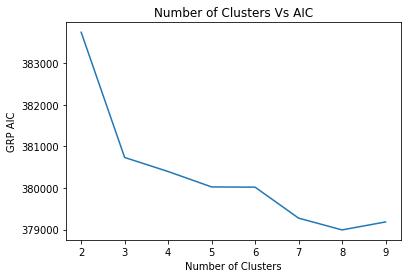

In [53]:
plot_line(range(2,10), grp_matrix[grp_matrix['n_components'] == 2]['AIC'],'Number of Clusters Vs AIC','GRP AIC','Number of Clusters')

In [67]:
# adding GRP rmse in DF with other RMSEs
add_column(kmeans_comparision,'grp_AIC', grp_matrix[grp_matrix['n_components'] == 2]['AIC'])
print(kmeans_comparision)

   Clusters        Normal          DR_dt       pca_AIC  ica_AIC        grp_AIC
0         2  1.114785e+06  132229.529863  2.169644e+06      NaN  383744.254193
1         3  1.081487e+05 -231848.314715  1.420814e+06      NaN  380734.017374
2         4 -9.010084e+05 -398797.774409  1.635830e+06      NaN  380395.786661
3         5 -4.394001e+05 -237805.096487  8.517743e+05      NaN  380025.569257
4         6 -3.600408e+06 -406435.576127 -1.169202e+05      NaN  380019.951209
5         7 -2.940366e+06 -406601.399767  6.477278e+05      NaN  379275.414417
6         8 -2.369680e+06 -407070.862675  2.961083e+05      NaN  378992.190011
7         9 -3.514266e+06 -413277.915910 -5.128562e+05      NaN  379183.689330


# Task 4: Training Neural Network

In [55]:
# creating a neural network running function
from sklearn.neural_network import MLPClassifier

def run_nn(X_train, X_test, y_train,y_test):
    nn_clf = MLPClassifier()
    nn_clf.fit(X_train,y_train)
    training_accuracy = nn_clf.score(X_train,y_train)
    test_accuracy = nn_clf.score(X_test,y_test)
    return(training_accuracy,test_accuracy)
    

In [68]:
# training and testing accuracy for normal data (w/o any dimensionality reduction)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)

print(X.shape, X_train.shape, X_test.shape)

(32561, 45) (22792, 45) (9769, 45)


In [69]:
print(run_nn(X_train, X_test, y_train,y_test))

(0.8913653913653914, 0.8443034087419388)


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [70]:
# training and testing data set for feature selected through decision tree 
X_train_dt = X_train[['marital-status_Married-civ-spouse','fnlwgt','education-num','age','capital-gain']]
X_test_dt = X_test[['marital-status_Married-civ-spouse','fnlwgt','education-num','age','capital-gain']]
print(X_train_dt.shape, X_test_dt.shape)

(22792, 5) (9769, 5)


In [71]:
# training and testing data for feature selected through PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

(22792, 28) (9769, 28)


In [72]:
# training and testing data for feature transformed through ICA
ica.set_params(n_components = 3)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

In [73]:
# traing and testing data for feature transformed through GRP
transformer.set_params(n_components = 3)
X_train_grp = transformer.fit_transform(X_train)
X_testr_grp = transformer.transform(X_test)

In [74]:
# running above different training and testing dataset through NN
X_train_lst = [X_train,X_train_dt, X_train_pca, X_train_ica, X_train_grp]
X_test_lst = [X_test, X_test_dt, X_test_pca, X_test_ica, X_testr_grp]

train_accu = []
test_accu = []

for i in range(5):
    nn_accu = run_nn(X_train_lst[i],X_test_lst[i],y_train,y_test)
    train_accu.append(nn_accu[0])
    test_accu.append(nn_accu[1])

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [75]:
# result comparision for transformed data
methodology = ['No Transformation','Fearure Selection: Decision Tree', 'PCA','ICA','RP - Gaussian Randmized Projections']

nn_results_comparision = pd.DataFrame({'Method': methodology,'Train Accuracy':train_accu, 'Test Accuracy':test_accu})
print(nn_results_comparision)

                                Method  Train Accuracy  Test Accuracy
0                    No Transformation        0.888821       0.844508
1     Fearure Selection: Decision Tree        0.847271       0.843177
2                                  PCA        0.877194       0.847170
3                                  ICA        0.789005       0.787593
4  RP - Gaussian Randmized Projections        0.765312       0.762616


# Task 5: applying neural network on clustering outcome

In [76]:
clust.set_params(n_components = 4)
y_predict = clust.fit_predict(X)
print(y_predict[:5])

[0 3 3 3 3]


In [77]:
#running NN on clustering output

X_train, X_test, y_train,y_test = train_test_split(y_predict,y,test_size = 0.3)

print(run_nn(X_train.reshape(-1,1),X_test.reshape(-1,1),y_train,y_test))

(0.7586433836433837, 0.7604667826799059)
